In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/PASCAL/'

/content/gdrive/MyDrive/PASCAL/VOCdevkit/VOC2007


In [ ]:
!wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget http://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar

In [ ]:
!tar -xvf VOCtrainval_06-Nov-2007.tar
!tar -xvf VOCtest_06-Nov-2007.tar

In [ ]:
%cd '/content/gdrive/MyDrive/PASCAL/VOCdevkit/VOC2007/'
%ls

/content/gdrive/MyDrive/PASCAL/VOCdevkit/VOC2007
Annotations/  JPEGImages/  SegmentationClass/
ImageSets/    seg_df.csv   SegmentationObject/


In [ ]:
len(dir('SegmentationClassge')), len(dir('SegmentationObject'))

(78, 78)

In [ ]:
import os
import numpy as np
import pandas as pd

import cv2

In [ ]:
class_png = os.listdir('SegmentationClass')
object_png = os.listdir('SegmentationObject')

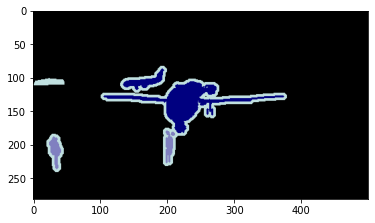

In [ ]:
img = cv2.imread('SegmentationClass/000032.png')
 
plt.imshow(img)
plt.show()

In [ ]:
!cat 'Annotations/000032.xml'

<annotation>
	<folder>VOC2007</folder>
	<filename>000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
		<flickrid>311023000</flickrid>
	</source>
	<owner>
		<flickrid>-hi-no-to-ri-mo-rt-al-</flickrid>
		<name>?</name>
	</owner>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195

In [ ]:
df = pd.read_csv('../../df.csv')
df['file_name'] = df['file_name'].str.replace('jpg', 'png')
df.head()

,file_name,file_type,object_length,object,xmin,ymin,xmax,ymax,pose,truncated,difficult
0,000012.png,train,5,car,156,97,351,270,Rear,0,0
1,000017.png,train,2,person,185,62,279,199,Left,0,0
2,000017.png,train,2,horse,90,78,403,336,Left,0,0
3,000023.png,train,6,bicycle,9,230,245,500,Unspecified,1,0
4,000023.png,train,6,bicycle,230,220,334,500,Frontal,1,0


In [ ]:
cond = df['file_name'].apply(lambda x : x in class_png)
df = df[cond]

In [ ]:
df

,file_name,file_type,object_length,object,xmin,ymin,xmax,ymax,pose,truncated,difficult
10,000032.png,train,4,aeroplane,104,78,375,183,Frontal,0,0
11,000032.png,train,4,aeroplane,133,88,197,123,Left,0,0
12,000032.png,train,4,person,195,180,213,229,Rear,0,0
13,000032.png,train,4,person,26,189,44,238,Rear,0,0
14,000033.png,train,3,aeroplane,9,107,499,263,Unspecified,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30606,009923.png,validation,5,cat,112,148,252,333,Unspecified,0,0
30625,009947.png,validation,2,boat,115,92,250,321,Left,0,0
30626,009947.png,validation,2,person,165,288,186,312,Unspecified,1,1
30627,009950.png,validation,2,train,1,2,500,332,Unspecified,1,0


In [ ]:
df.to_csv('seg_df.csv', index=False)